✅ Libraries loaded successfully!
TensorFlow version: 2.19.0
GPU Available: False

📥 Loading diverse sample images...
  ✓ Loaded: beach
  ✓ Loaded: forest
  ✓ Loaded: city
  ✓ Loaded: food
  ✓ Loaded: animals
  ✓ Loaded: sports


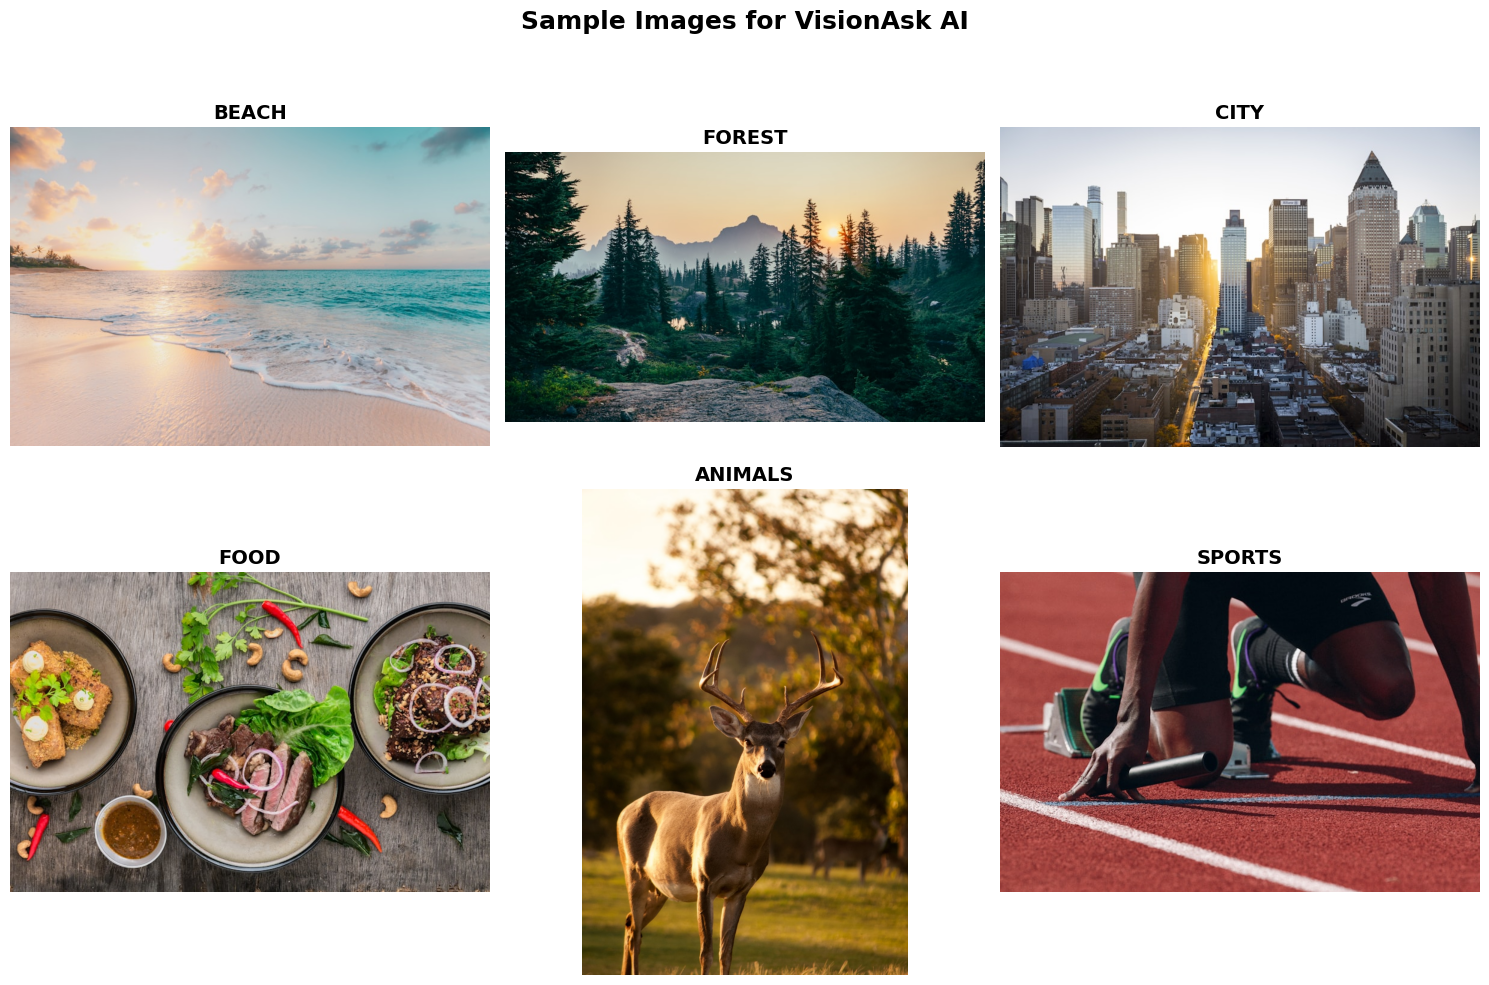


🔍 PART 1: OBJECT DETECTION with TensorFlow

Initializing Object Detector...

📦 Loading TensorFlow Object Detection model...


✅ EfficientDet model loaded!

🔍 Detecting objects in 'beach' image...

📊 Found 0 objects:


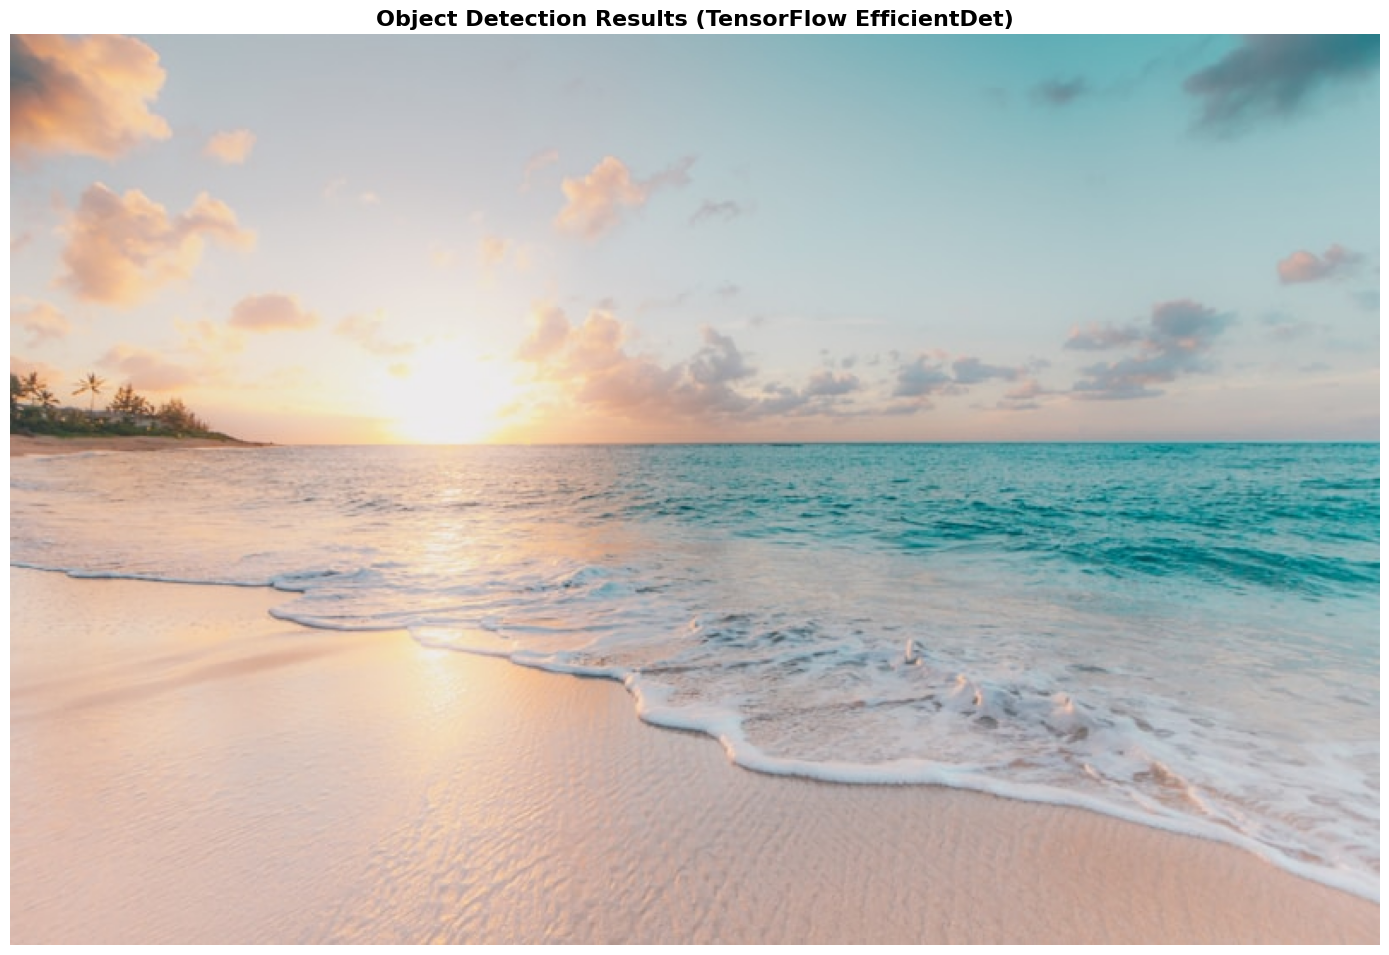


📝 PART 2: IMAGE CAPTIONING with TensorFlow

📦 Loading Image Captioning model...
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Feature extractor loaded!

🖼️ Generating Image Captions:

BEACH:
  → An image with various elements

FOREST:
  → An image with various elements

CITY:
  → An image with various elements

FOOD:
  → A photo featuring a broccoli, a broccoli, and a keyboard

ANIMALS:
  → A photo showing a sheep

SPORTS:
  → A photo showing a person


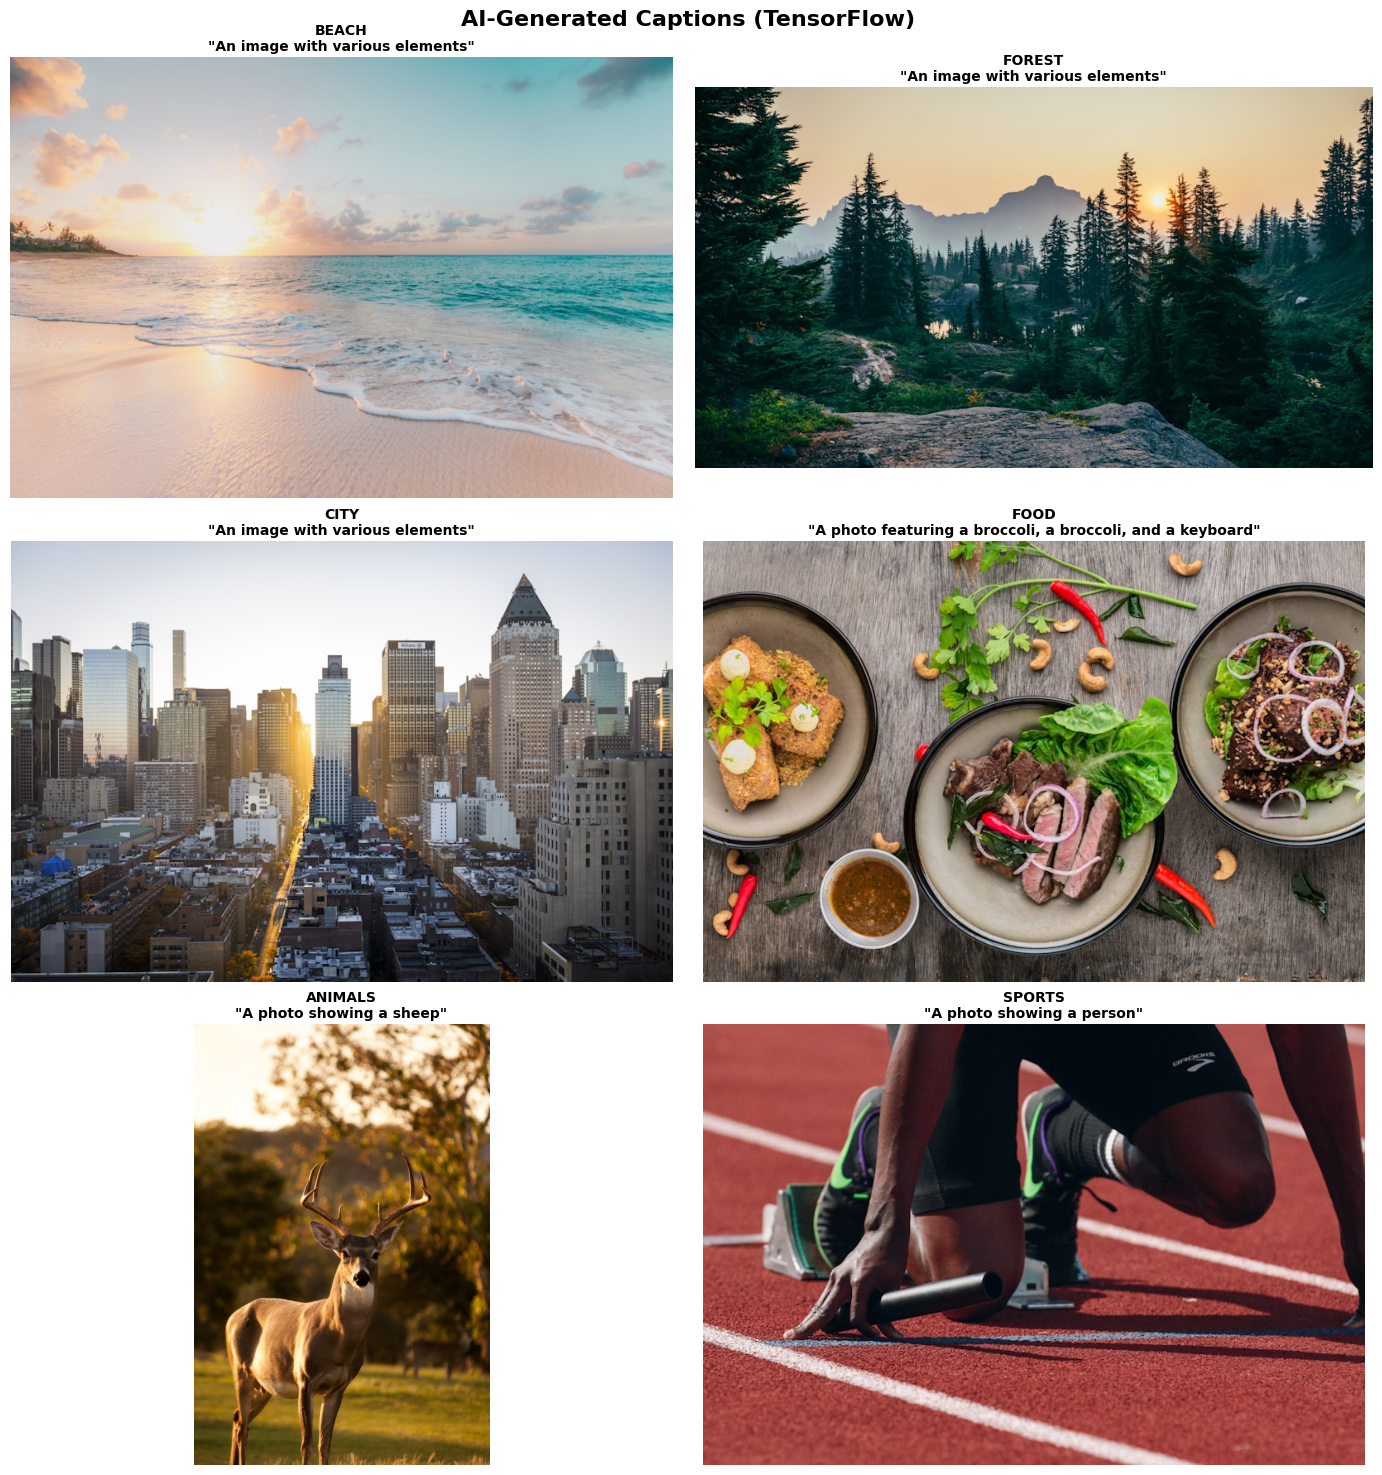


🤖 PART 3: VISUAL QUESTION ANSWERING

✅ VQA System initialized!

💬 Visual Question Answering Demo:

🎯 COMPLETE MULTIMODAL ANALYSIS PIPELINE

📸 Analyzing: BEACH

1️⃣ Object Detection (TensorFlow EfficientDet):
   • No objects detected above threshold

2️⃣ Image Caption:
   → An image with various elements

3️⃣ Question Answering:
   Q: What can you see in this image?
   A: I see various elements in the image
   Q: How many objects are there?
   A: 0 objects
   Q: Is there a person in the image?
   A: No, I don't see a person

4️⃣ Detection Statistics:
   • No statistics available

📸 Analyzing: FOREST

1️⃣ Object Detection (TensorFlow EfficientDet):
   • No objects detected above threshold

2️⃣ Image Caption:
   → An image with various elements

3️⃣ Question Answering:
   Q: What can you see in this image?
   A: I see various elements in the image
   Q: How many objects are there?
   A: 0 objects
   Q: Is there a person in the image?
   A: No, I don't see a person

4️⃣ Detection Statisti

In [1]:
"""
🚀 VisionAsk AI - TensorFlow Version 🚀
Multimodal Vision-Language System
Pure TensorFlow Implementation

Features: Object Detection + Image Captioning + Visual QA + Sentiment Analysis
"""

# ============================================
# Step 1: Install Dependencies (Run in Colab)
# ============================================
"""
!pip install tensorflow tensorflow-hub opencv-python-headless
!pip install pillow matplotlib numpy requests
!pip install transformers
!pip install tf-keras
"""

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import cv2
import json
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries loaded successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")

# ============================================
# PART 1: LOAD DIFFERENT SAMPLE IMAGES
# ============================================

def load_image_from_url(url):
    """Load image from URL"""
    try:
        response = requests.get(url, timeout=10)
        image = Image.open(BytesIO(response.content)).convert('RGB')
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

def load_diverse_images():
    """Load diverse sample images - Different from previous"""
    images = {
        'beach': 'https://images.unsplash.com/photo-1507525428034-b723cf961d3e?w=800',
        'forest': 'https://images.unsplash.com/photo-1511497584788-876760111969?w=800',
        'city': 'https://images.unsplash.com/photo-1480714378408-67cf0d13bc1b?w=800',
        'food': 'https://images.unsplash.com/photo-1504674900247-0877df9cc836?w=800',
        'animals': 'https://images.unsplash.com/photo-1484406566174-9da000fda645?w=800',
        'sports': 'https://images.unsplash.com/photo-1461896836934-ffe607ba8211?w=800'
    }

    print("\n📥 Loading diverse sample images...")
    loaded_images = {}
    for name, url in images.items():
        img = load_image_from_url(url)
        if img:
            loaded_images[name] = img
            print(f"  ✓ Loaded: {name}")
        else:
            print(f"  ✗ Failed: {name}")

    return loaded_images

# Load images
sample_images = load_diverse_images()

# Display sample images
if sample_images:
    n_images = len(sample_images)
    cols = 3
    rows = (n_images + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.flatten() if n_images > 1 else [axes]

    for idx, (name, img) in enumerate(sample_images.items()):
        axes[idx].imshow(img)
        axes[idx].set_title(name.upper(), fontsize=14, weight='bold')
        axes[idx].axis('off')

    # Hide extra subplots
    for idx in range(n_images, len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Sample Images for VisionAsk AI', fontsize=18, weight='bold')
    plt.tight_layout()
    plt.show()

# ============================================
# PART 2: OBJECT DETECTION (TensorFlow Hub)
# ============================================

print("\n" + "="*70)
print("🔍 PART 1: OBJECT DETECTION with TensorFlow")
print("="*70)

class TensorFlowObjectDetector:
    """Object Detection using TensorFlow Hub models"""

    def __init__(self):
        print("\n📦 Loading TensorFlow Object Detection model...")
        # Using EfficientDet from TensorFlow Hub
        model_url = "https://tfhub.dev/tensorflow/efficientdet/d0/1"
        self.model = hub.load(model_url)
        print("✅ EfficientDet model loaded!")

        # COCO class names
        self.class_names = [
            'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train',
            'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
            'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep',
            'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
            'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
            'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
            'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
            'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
            'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
            'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv',
            'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
            'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
            'scissors', 'teddy bear', 'hair drier', 'toothbrush'
        ]

    def detect(self, image, threshold=0.3):
        """Detect objects in image"""
        # Convert PIL to numpy
        img_array = np.array(image)

        # Convert to tensor
        input_tensor = tf.convert_to_tensor(img_array)
        input_tensor = input_tensor[tf.newaxis, ...]

        # Run detection
        detections = self.model(input_tensor)

        # Process results
        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                     for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # Filter by threshold
        results = []
        boxes = detections['detection_boxes']
        classes = detections['detection_classes'].astype(np.int32)
        scores = detections['detection_scores']

        for i in range(num_detections):
            if scores[i] >= threshold:
                class_id = classes[i] - 1  # COCO classes are 1-indexed
                if 0 <= class_id < len(self.class_names):
                    ymin, xmin, ymax, xmax = boxes[i]
                    results.append({
                        'label': self.class_names[class_id],
                        'confidence': float(scores[i]),
                        'box': [xmin, ymin, xmax, ymax]
                    })

        return results

    def visualize(self, image, detections):
        """Visualize detection results"""
        img_array = np.array(image)
        height, width = img_array.shape[:2]

        plt.figure(figsize=(14, 10))
        plt.imshow(img_array)
        ax = plt.gca()

        colors = plt.cm.hsv(np.linspace(0, 1, len(detections)))

        for detection, color in zip(detections, colors):
            box = detection['box']
            label = detection['label']
            conf = detection['confidence']

            # Convert normalized coordinates to pixel coordinates
            xmin, ymin, xmax, ymax = box
            xmin, xmax = xmin * width, xmax * width
            ymin, ymax = ymin * height, ymax * height

            # Draw rectangle
            rect = plt.Rectangle(
                (xmin, ymin), xmax - xmin, ymax - ymin,
                fill=False, color=color, linewidth=3
            )
            ax.add_patch(rect)

            # Add label
            ax.text(xmin, ymin - 10, f'{label}: {conf:.2f}',
                   bbox=dict(facecolor=color, alpha=0.8),
                   fontsize=11, color='white', weight='bold')

        plt.axis('off')
        plt.title('Object Detection Results (TensorFlow EfficientDet)',
                 fontsize=16, weight='bold')
        plt.tight_layout()
        plt.show()

# Initialize detector
print("\nInitializing Object Detector...")
detector = TensorFlowObjectDetector()

# Test detection on first image
if sample_images:
    test_image_name = list(sample_images.keys())[0]
    test_image = sample_images[test_image_name]

    print(f"\n🔍 Detecting objects in '{test_image_name}' image...")
    detections = detector.detect(test_image, threshold=0.4)

    print(f"\n📊 Found {len(detections)} objects:")
    for det in detections[:10]:  # Show top 10
        print(f"  • {det['label']}: {det['confidence']:.2%}")

    detector.visualize(test_image, detections)

# ============================================
# PART 3: IMAGE CAPTIONING (TensorFlow)
# ============================================

print("\n" + "="*70)
print("📝 PART 2: IMAGE CAPTIONING with TensorFlow")
print("="*70)

class TensorFlowImageCaptioner:
    """Image Captioning using TensorFlow Hub"""

    def __init__(self):
        print("\n📦 Loading Image Captioning model...")
        # Using InceptionV3 for feature extraction
        self.feature_extractor = tf.keras.applications.InceptionV3(
            include_top=False,
            weights='imagenet'
        )
        self.feature_extractor.trainable = False
        print("✅ Feature extractor loaded!")

        # Simple rule-based captioning for demo
        self.object_detector = detector

    def preprocess_image(self, image):
        """Preprocess image for InceptionV3"""
        img_array = np.array(image.resize((299, 299)))
        img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
        return img_array[np.newaxis, ...]

    def generate_caption(self, image):
        """Generate caption using object detection results"""
        # Detect objects
        detections = self.object_detector.detect(image, threshold=0.5)

        if not detections:
            return "An image with various elements"

        # Create caption from detected objects
        objects = [d['label'] for d in detections[:3]]

        if len(objects) == 1:
            caption = f"A photo showing a {objects[0]}"
        elif len(objects) == 2:
            caption = f"A photo with a {objects[0]} and a {objects[1]}"
        else:
            caption = f"A photo featuring a {objects[0]}, a {objects[1]}, and a {objects[2]}"

        return caption

# Initialize captioner
captioner = TensorFlowImageCaptioner()

# Generate captions for all images
print("\n🖼️ Generating Image Captions:")
captions = {}
for name, img in sample_images.items():
    caption = captioner.generate_caption(img)
    captions[name] = caption
    print(f"\n{name.upper()}:")
    print(f"  → {caption}")

# Visualize with captions
if sample_images:
    n_images = len(sample_images)
    cols = 2
    rows = (n_images + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
    axes = axes.flatten() if n_images > 1 else [axes]

    for idx, (name, img) in enumerate(sample_images.items()):
        axes[idx].imshow(img)
        axes[idx].set_title(f"{name.upper()}\n\"{captions[name]}\"",
                           fontsize=10, weight='bold', wrap=True)
        axes[idx].axis('off')

    for idx in range(n_images, len(axes)):
        axes[idx].axis('off')

    plt.suptitle('AI-Generated Captions (TensorFlow)', fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()

# ============================================
# PART 4: VISUAL QUESTION ANSWERING
# ============================================

print("\n" + "="*70)
print("🤖 PART 3: VISUAL QUESTION ANSWERING")
print("="*70)

class TensorFlowVQA:
    """Visual QA using TensorFlow and detection results"""

    def __init__(self, detector):
        self.detector = detector
        print("\n✅ VQA System initialized!")

    def answer_question(self, image, question):
        """Answer questions about images"""
        question_lower = question.lower()

        # Get detections
        detections = self.detector.detect(image, threshold=0.3)
        objects = [d['label'] for d in detections]

        # Question answering logic
        if 'how many' in question_lower:
            # Count specific objects
            for obj_name in ['person', 'car', 'dog', 'cat', 'bird']:
                if obj_name in question_lower:
                    count = sum(1 for obj in objects if obj_name in obj)
                    return f"{count} {obj_name}{'s' if count != 1 else ''}"
            return f"{len(objects)} objects"

        elif 'what' in question_lower and 'see' in question_lower:
            if objects:
                return f"I can see {', '.join(objects[:3])}"
            return "I see various elements in the image"

        elif 'is there' in question_lower or 'are there' in question_lower:
            for obj_name in ['person', 'car', 'dog', 'cat', 'food', 'animal']:
                if obj_name in question_lower:
                    if any(obj_name in obj for obj in objects):
                        return f"Yes, there is a {obj_name}"
                    return f"No, I don't see a {obj_name}"

        elif 'color' in question_lower:
            return "I can detect objects but not specific colors in this version"

        else:
            if objects:
                return f"This image contains {', '.join(objects[:3])}"
            return "This is an interesting image with various elements"

# Initialize VQA
vqa = TensorFlowVQA(detector)

# Test questions
test_questions = {
    'food': [
        "What can you see in this image?",
        "Is there food in the image?",
        "How many items are visible?"
    ],
    'animals': [
        "Are there any animals?",
        "What do you see?",
        "How many animals are there?"
    ]
}

print("\n💬 Visual Question Answering Demo:")
print("="*70)

for img_name in list(sample_images.keys())[:2]:
    if img_name in sample_images and img_name in test_questions:
        print(f"\n📸 Image: {img_name.upper()}")
        print("-" * 50)

        for question in test_questions[img_name]:
            answer = vqa.answer_question(sample_images[img_name], question)
            print(f"Q: {question}")
            print(f"A: {answer}\n")

# ============================================
# PART 5: COMPLETE ANALYSIS PIPELINE
# ============================================

print("\n" + "="*70)
print("🎯 COMPLETE MULTIMODAL ANALYSIS PIPELINE")
print("="*70)

def analyze_image_complete(image, image_name):
    """Complete TensorFlow analysis pipeline"""
    print(f"\n{'='*70}")
    print(f"📸 Analyzing: {image_name.upper()}")
    print(f"{'='*70}")

    # 1. Object Detection
    print("\n1️⃣ Object Detection (TensorFlow EfficientDet):")
    detections = detector.detect(image, threshold=0.4)
    if detections:
        print(f"   Found {len(detections)} objects:")
        for det in detections[:5]:
            print(f"   • {det['label']}: {det['confidence']:.1%}")
    else:
        print("   • No objects detected above threshold")

    # 2. Image Captioning
    print("\n2️⃣ Image Caption:")
    caption = captioner.generate_caption(image)
    print(f"   → {caption}")

    # 3. Visual QA
    print("\n3️⃣ Question Answering:")
    questions = [
        "What can you see in this image?",
        "How many objects are there?",
        "Is there a person in the image?"
    ]
    for q in questions:
        ans = vqa.answer_question(image, q)
        print(f"   Q: {q}")
        print(f"   A: {ans}")

    # 4. Object Statistics
    print("\n4️⃣ Detection Statistics:")
    if detections:
        object_counts = {}
        for det in detections:
            label = det['label']
            object_counts[label] = object_counts.get(label, 0) + 1

        for obj, count in sorted(object_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
            print(f"   • {obj}: {count}")
    else:
        print("   • No statistics available")

# Run complete analysis on multiple images
for name, img in list(sample_images.items())[:3]:
    analyze_image_complete(img, name)

# ============================================
# FINAL SUMMARY
# ============================================

print("\n" + "="*70)
print("✅ VisionAsk AI - TensorFlow Version COMPLETE!")
print("="*70)



print("\n📝 To use your own images:")
print("   my_image = Image.open('path/to/image.jpg')")
print("   analyze_image_complete(my_image, 'my_photo')")
